In [4]:
import json
import os
import math

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
plt.rcParams["figure.figsize"] = (12,5.5)

## Setup
Load config, data etc

In [6]:
with open("config.json", "r") as f:
        config = json.loads(f.read())

In [7]:
train_path = config["plot"]["train_path"]
dev_path = config["plot"]["dev_path"]
input_path = config["plot"]["metrics_path"]
output_path = config["plot"]["output_path"]
if not os.path.exists(output_path):
        os.makedirs(output_path)
train_path, dev_path, input_path, output_path

('corpora/chemprot_train.txt',
 'corpora/chemprot_dev.txt',
 'models/baseline_models/larger/metrics.txt',
 'models/baseline_models/larger/plots/')

In [8]:
def read_data(filename):
  print("File: ", filename)
  with open(filename) as json_file:
    data = json.loads(json_file.read())
  
    return data


In [9]:
data = read_data(input_path)
train_key = train_path.split("/")[-1]
dev_key = dev_path.split("/")[-1]

indices = range(1, len(data['average training loss']) + 1) 

train_data, dev_data, indices, output_dir=data[train_key], data[dev_key], indices, output_path
x = list(indices)

File:  models/baseline_models/larger/metrics.txt


## Plotting functions
Plotting functions for loss/accuracy, single metric, scores with multiple averages & confusion matrices

In [44]:
def plot_loss_acc(data, indices, output_dir, train_key, save_to_file = True):  
  x = list(indices)
  plt.xticks(indices)

  plt.plot(x, data['average training loss'],     color="blue")
  plt.plot(x, data['average validation loss'],   color="red")
  plt.plot(x, data[train_key]['accuracy'],     color="green") # accuracies returned by the eval.py script
  plt.plot(x, data['average validation accuracy'], color="orange")

  plt.legend(['avg. training loss', 'avg. validation loss', 
              'avg. training accuracy', 'avg. validation accuracy'], 
              loc="upper center", bbox_to_anchor=(0.5, 1.23),
              fancybox=True, ncol=2)

  plt.xlabel('epoch')
  plt.tight_layout()
  plt.show()
  
  if save_to_file: plt.savefig(output_dir + '/training_validation.png')

In [16]:
def plot_metric(metric, save_to_file = True):
    plt.xticks(indices)

    plt.plot(x, train_data[metric], color="blue")
    plt.plot(x, dev_data[metric], color="red")

    plt.legend(["train", "dev"], loc="upper center", bbox_to_anchor=(0.5, 1.15),
        fancybox=True, ncol=2)

    plt.xlabel('epoch')
    plt.ylabel(metric)
    plt.show()
    # plt.close()

    if save_to_file: plt.savefig(output_dir + '/{}.png'.format(metric))

In [33]:
def plot_score_averages(metric, average_types = False, save_to_file = True):
    if not average_types: average_types = train_data[metric].keys()
    markers = {'macro' : '^', 'micro' : 'v', 'weighted' : 'x'}
    legend_list = []
    
    plt.figure()
    plt.xticks(indices)
    
    for avg_type in average_types:  
        plt.plot(x, train_data[metric][avg_type], marker=markers[avg_type])
        legend_list += [f"train {avg_type}"]
        plt.plot(x, dev_data[metric][avg_type], marker=markers[avg_type])
        legend_list += [f"dev {avg_type}"]
    
    plt.legend(legend_list, loc="upper center", bbox_to_anchor=(0.5, 1.18),
        fancybox=True, ncol=len(average_types))
    plt.xlabel('epoch')
    plt.ylabel(metric)
    plt.show()
    
    if save_to_file: plt.savefig(output_dir + '/{}.png'.format(metric))
    

In [86]:
def plot_confusion_matrices(data, data_name, save_to_file = True):
    class_list = ["INTERACTOR", "NOT", "PART-OF", "REGULATOR-NEGATIVE", "REGULATOR-POSITIVE"]

    row = math.ceil(math.sqrt(len(x)))
    col = math.floor(math.sqrt(len(x)))

    fig, axs = plt.subplots(row, col, figsize=(5*row,7*col), sharey=True, sharex=True)
    fig.suptitle(f"{data_name} confusion matrices")

    for i in range(len(x)):
        
        cm_df = pd.DataFrame(data["confusion matrices"][i],
                    index = class_list, 
                    columns = class_list)

        g = sns.heatmap(cm_df, annot=True, cmap='Blues', ax=axs.flat[i], cbar=False, fmt='d')
        g.set_title('Epoch: ' + str(i+1))
        g.set_ylabel('Actal Values')
        g.set_xlabel('Predicted Values')
        g.xaxis.set_label_position('top')
        g.yaxis.set_label_position('right')
    
    # g.yaxis.tick_right()
    plt.show()
    # plt.close()
    
    if save_to_file: plt.savefig(output_dir + '/{}-confusion.png'.format(data_name))

## Plots

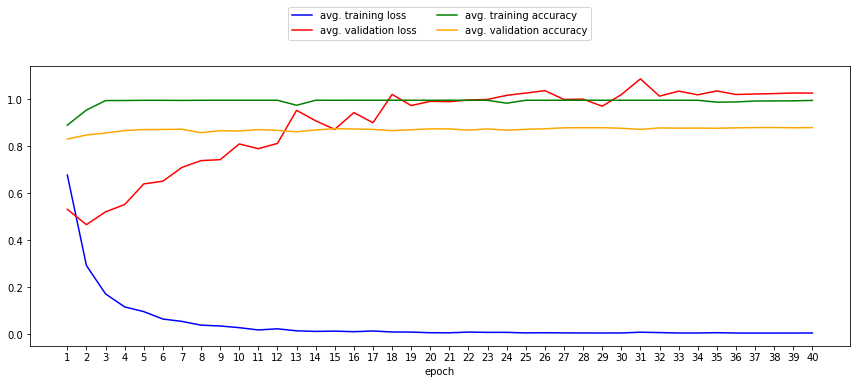

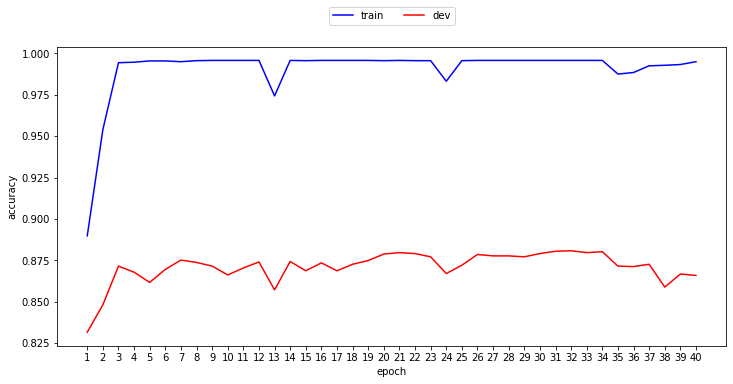

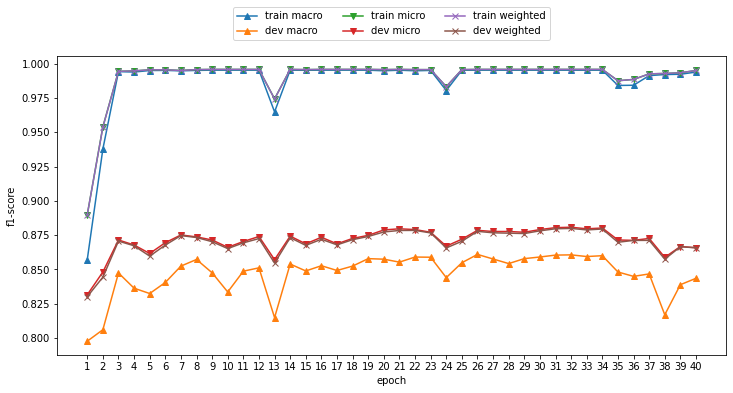

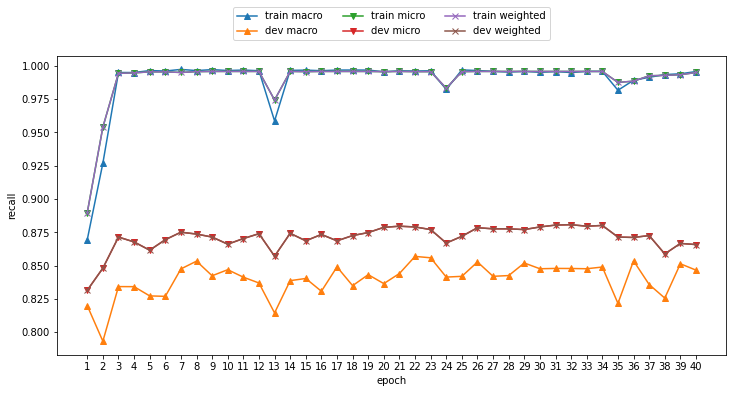

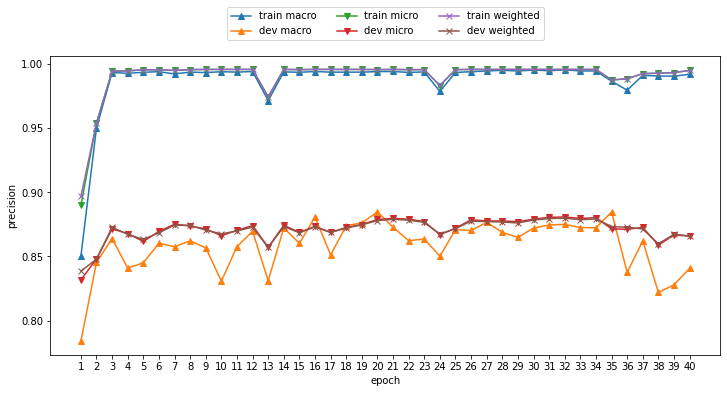

In [38]:
plot_loss_acc(data, indices, output_path, train_key)
plot_metric("accuracy")
plot_score_averages("f1-score")
plot_score_averages("recall")
plot_score_averages("precision")

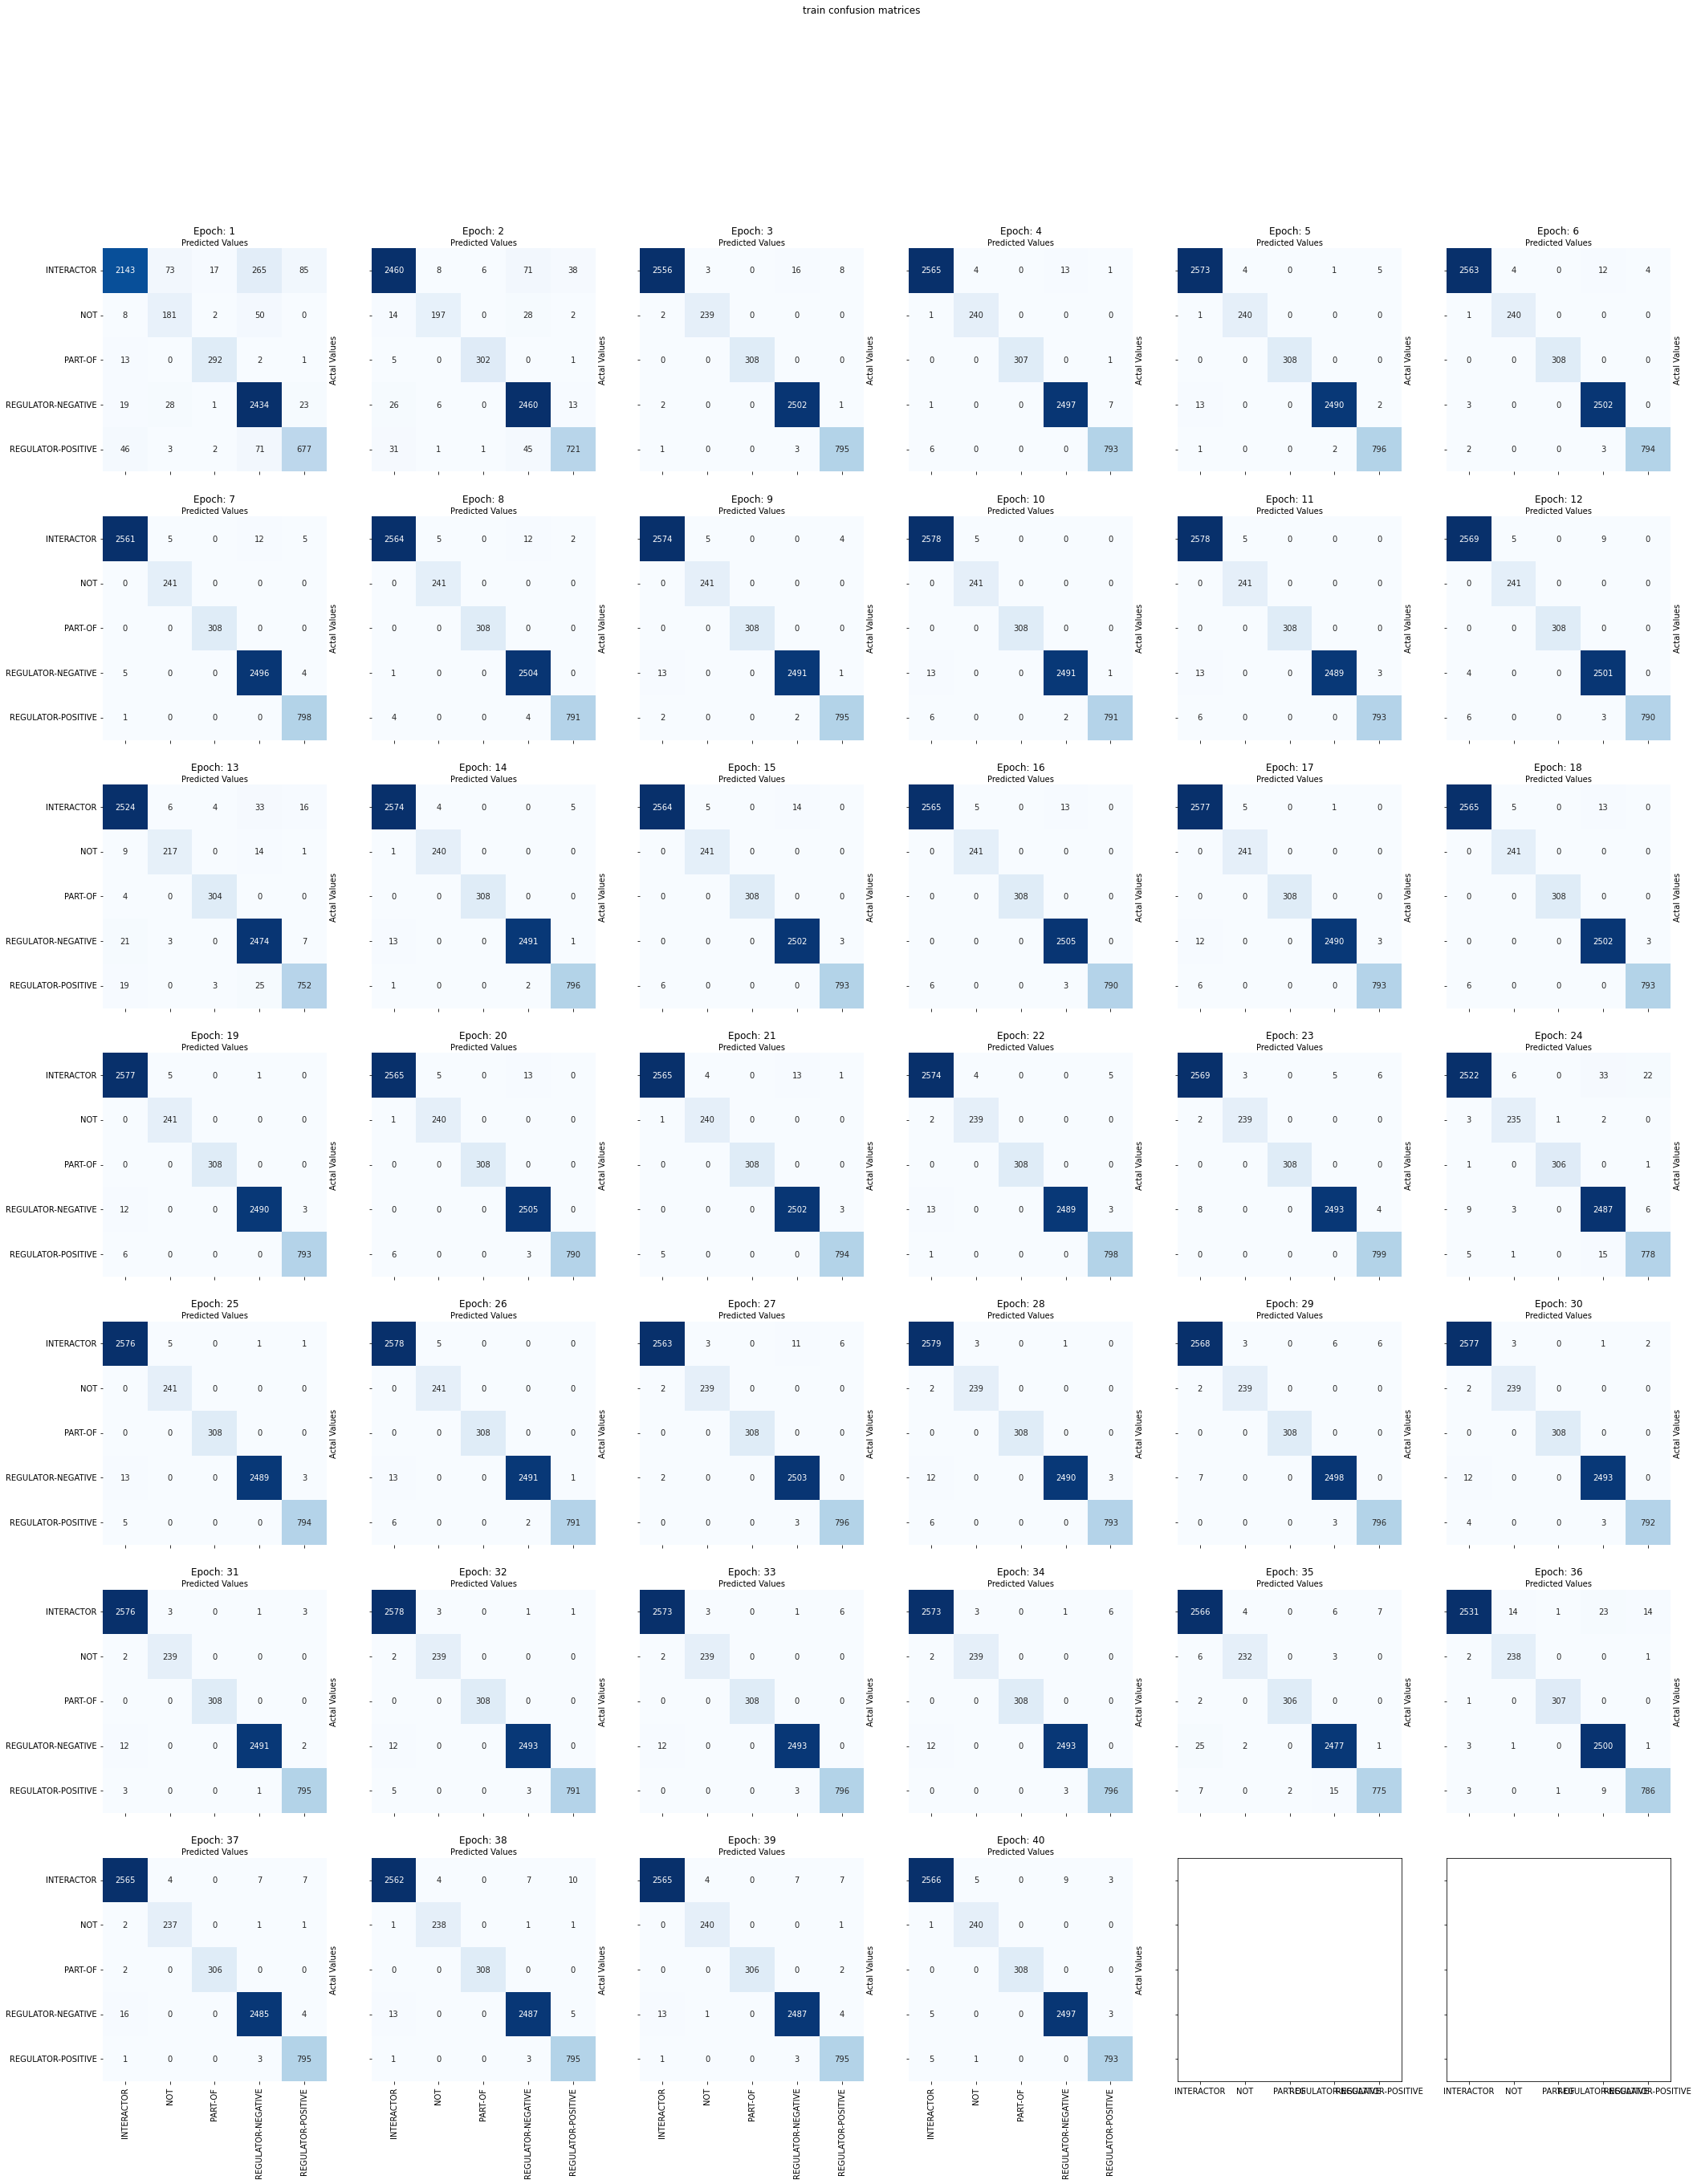

<Figure size 864x396 with 0 Axes>

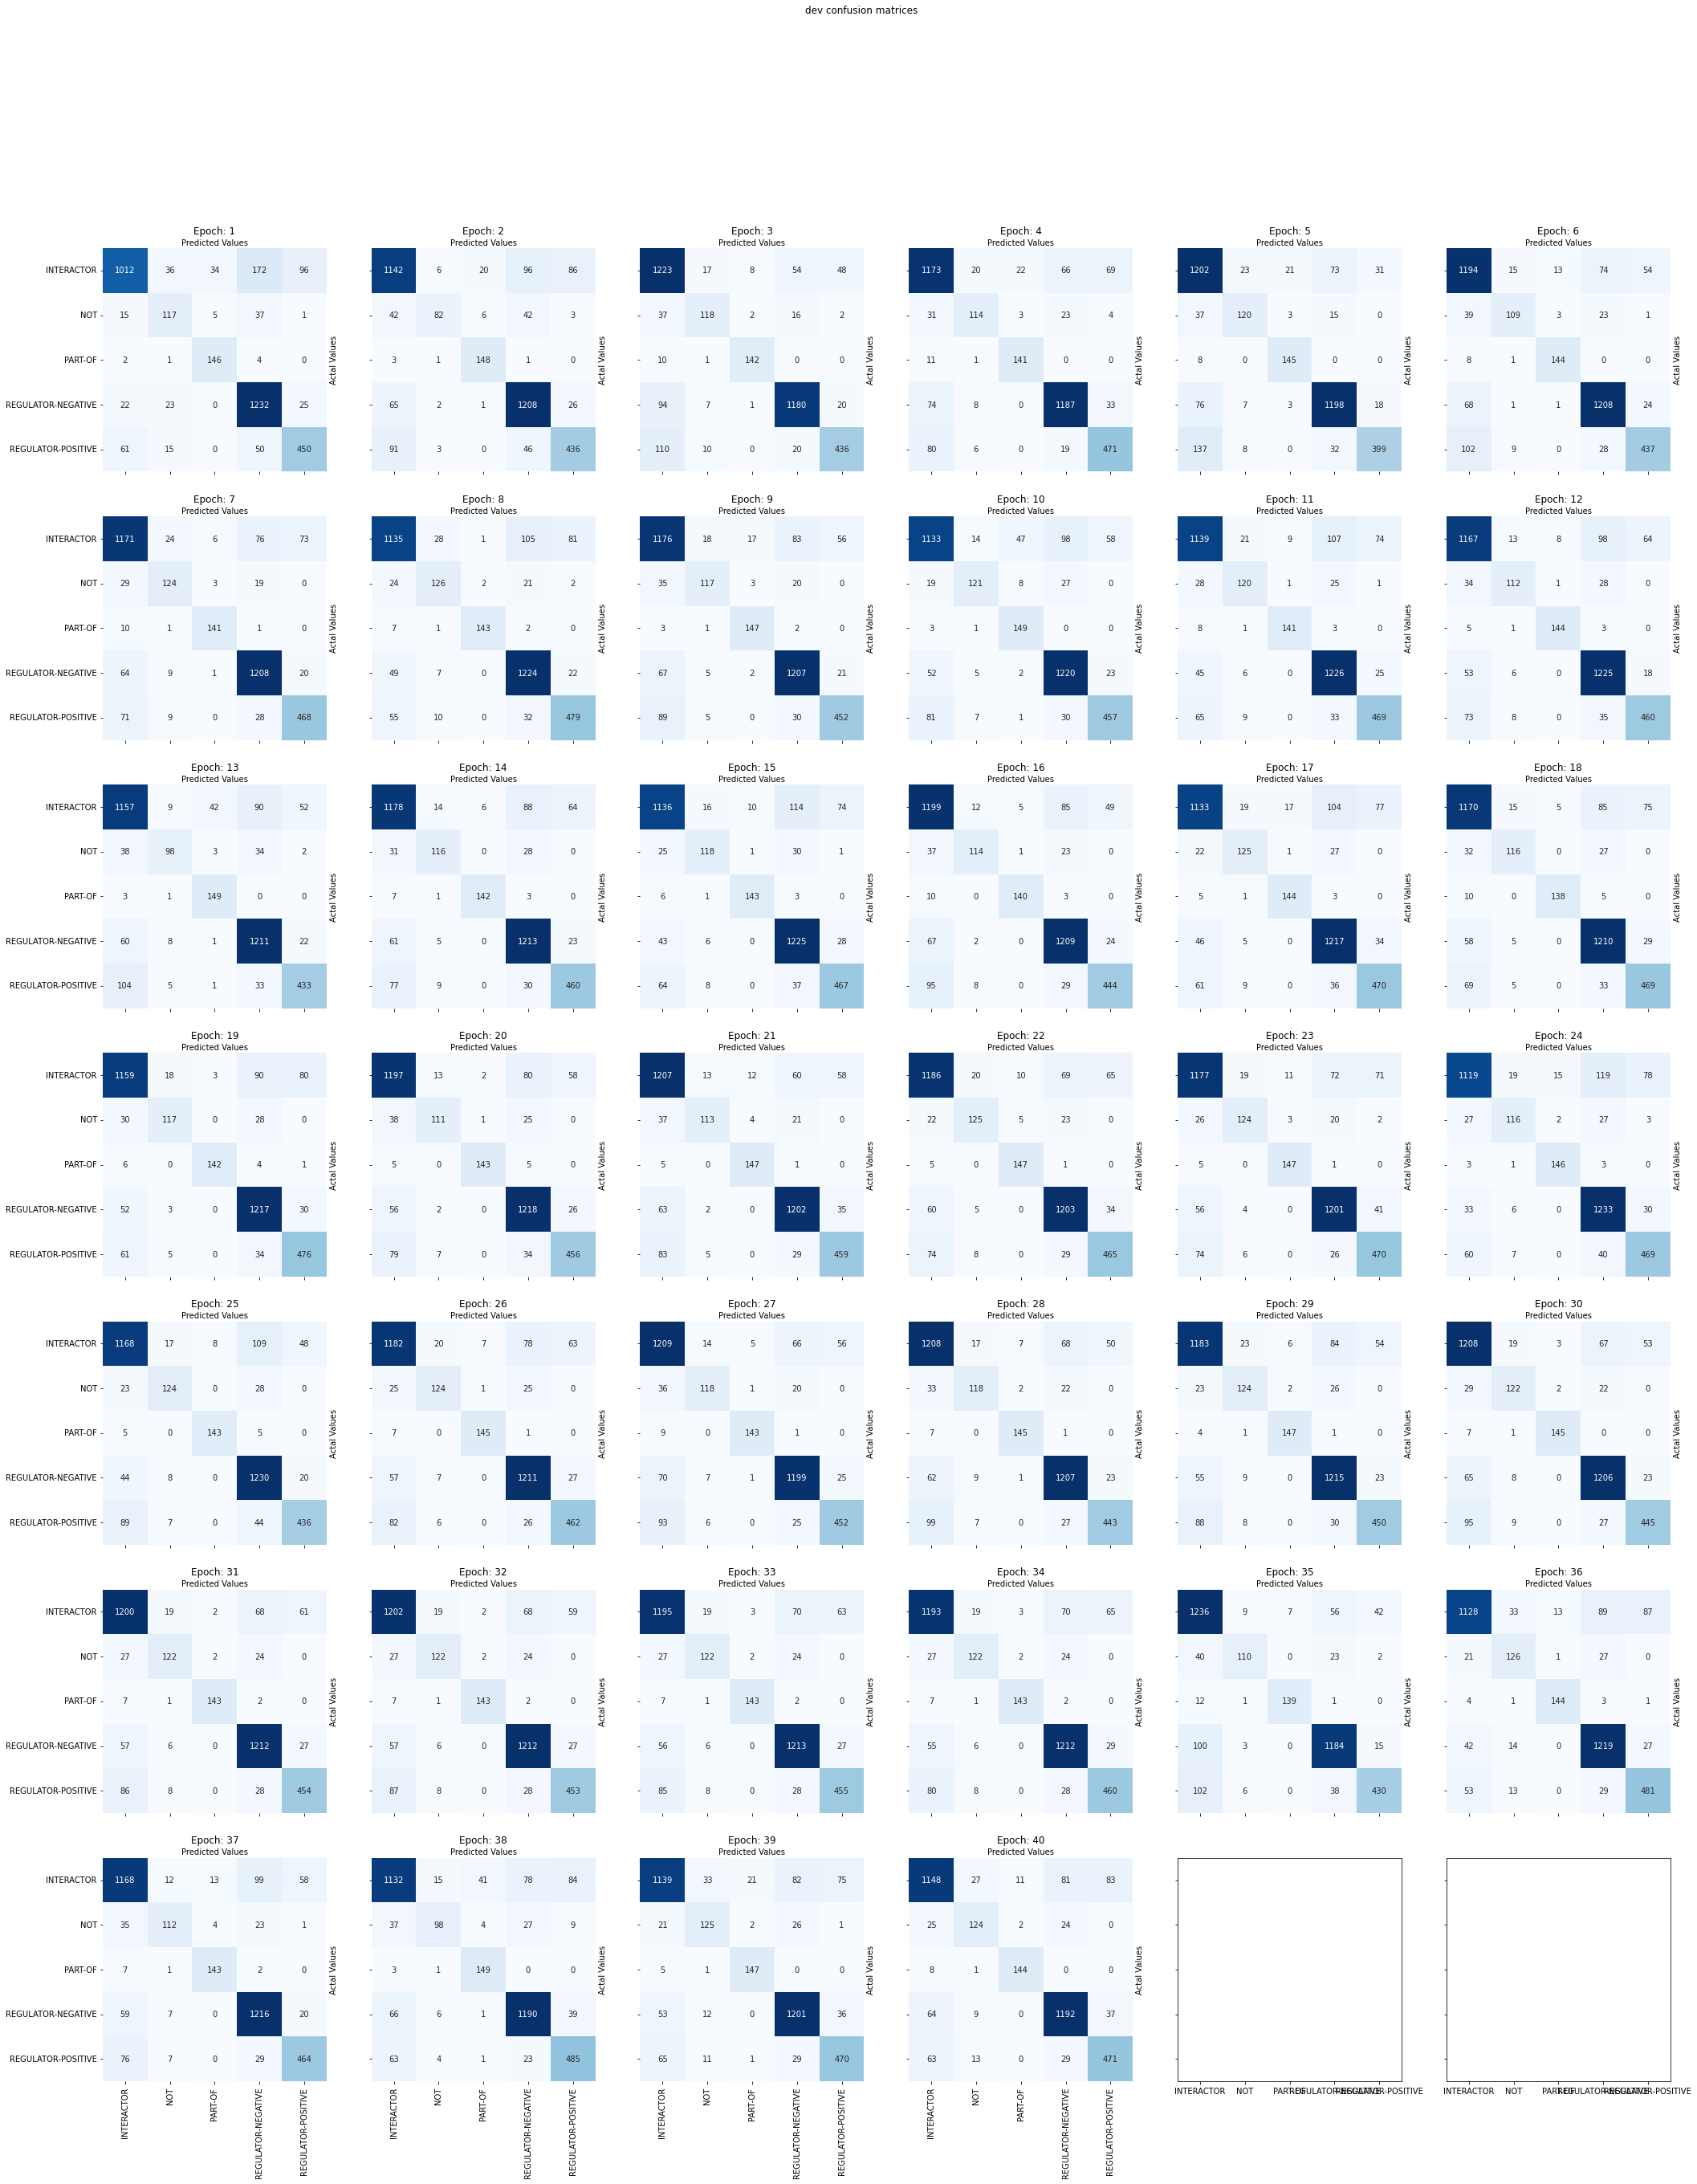

<Figure size 864x396 with 0 Axes>

In [87]:
plot_confusion_matrices(train_data, "train")
plot_confusion_matrices(dev_data, "dev")

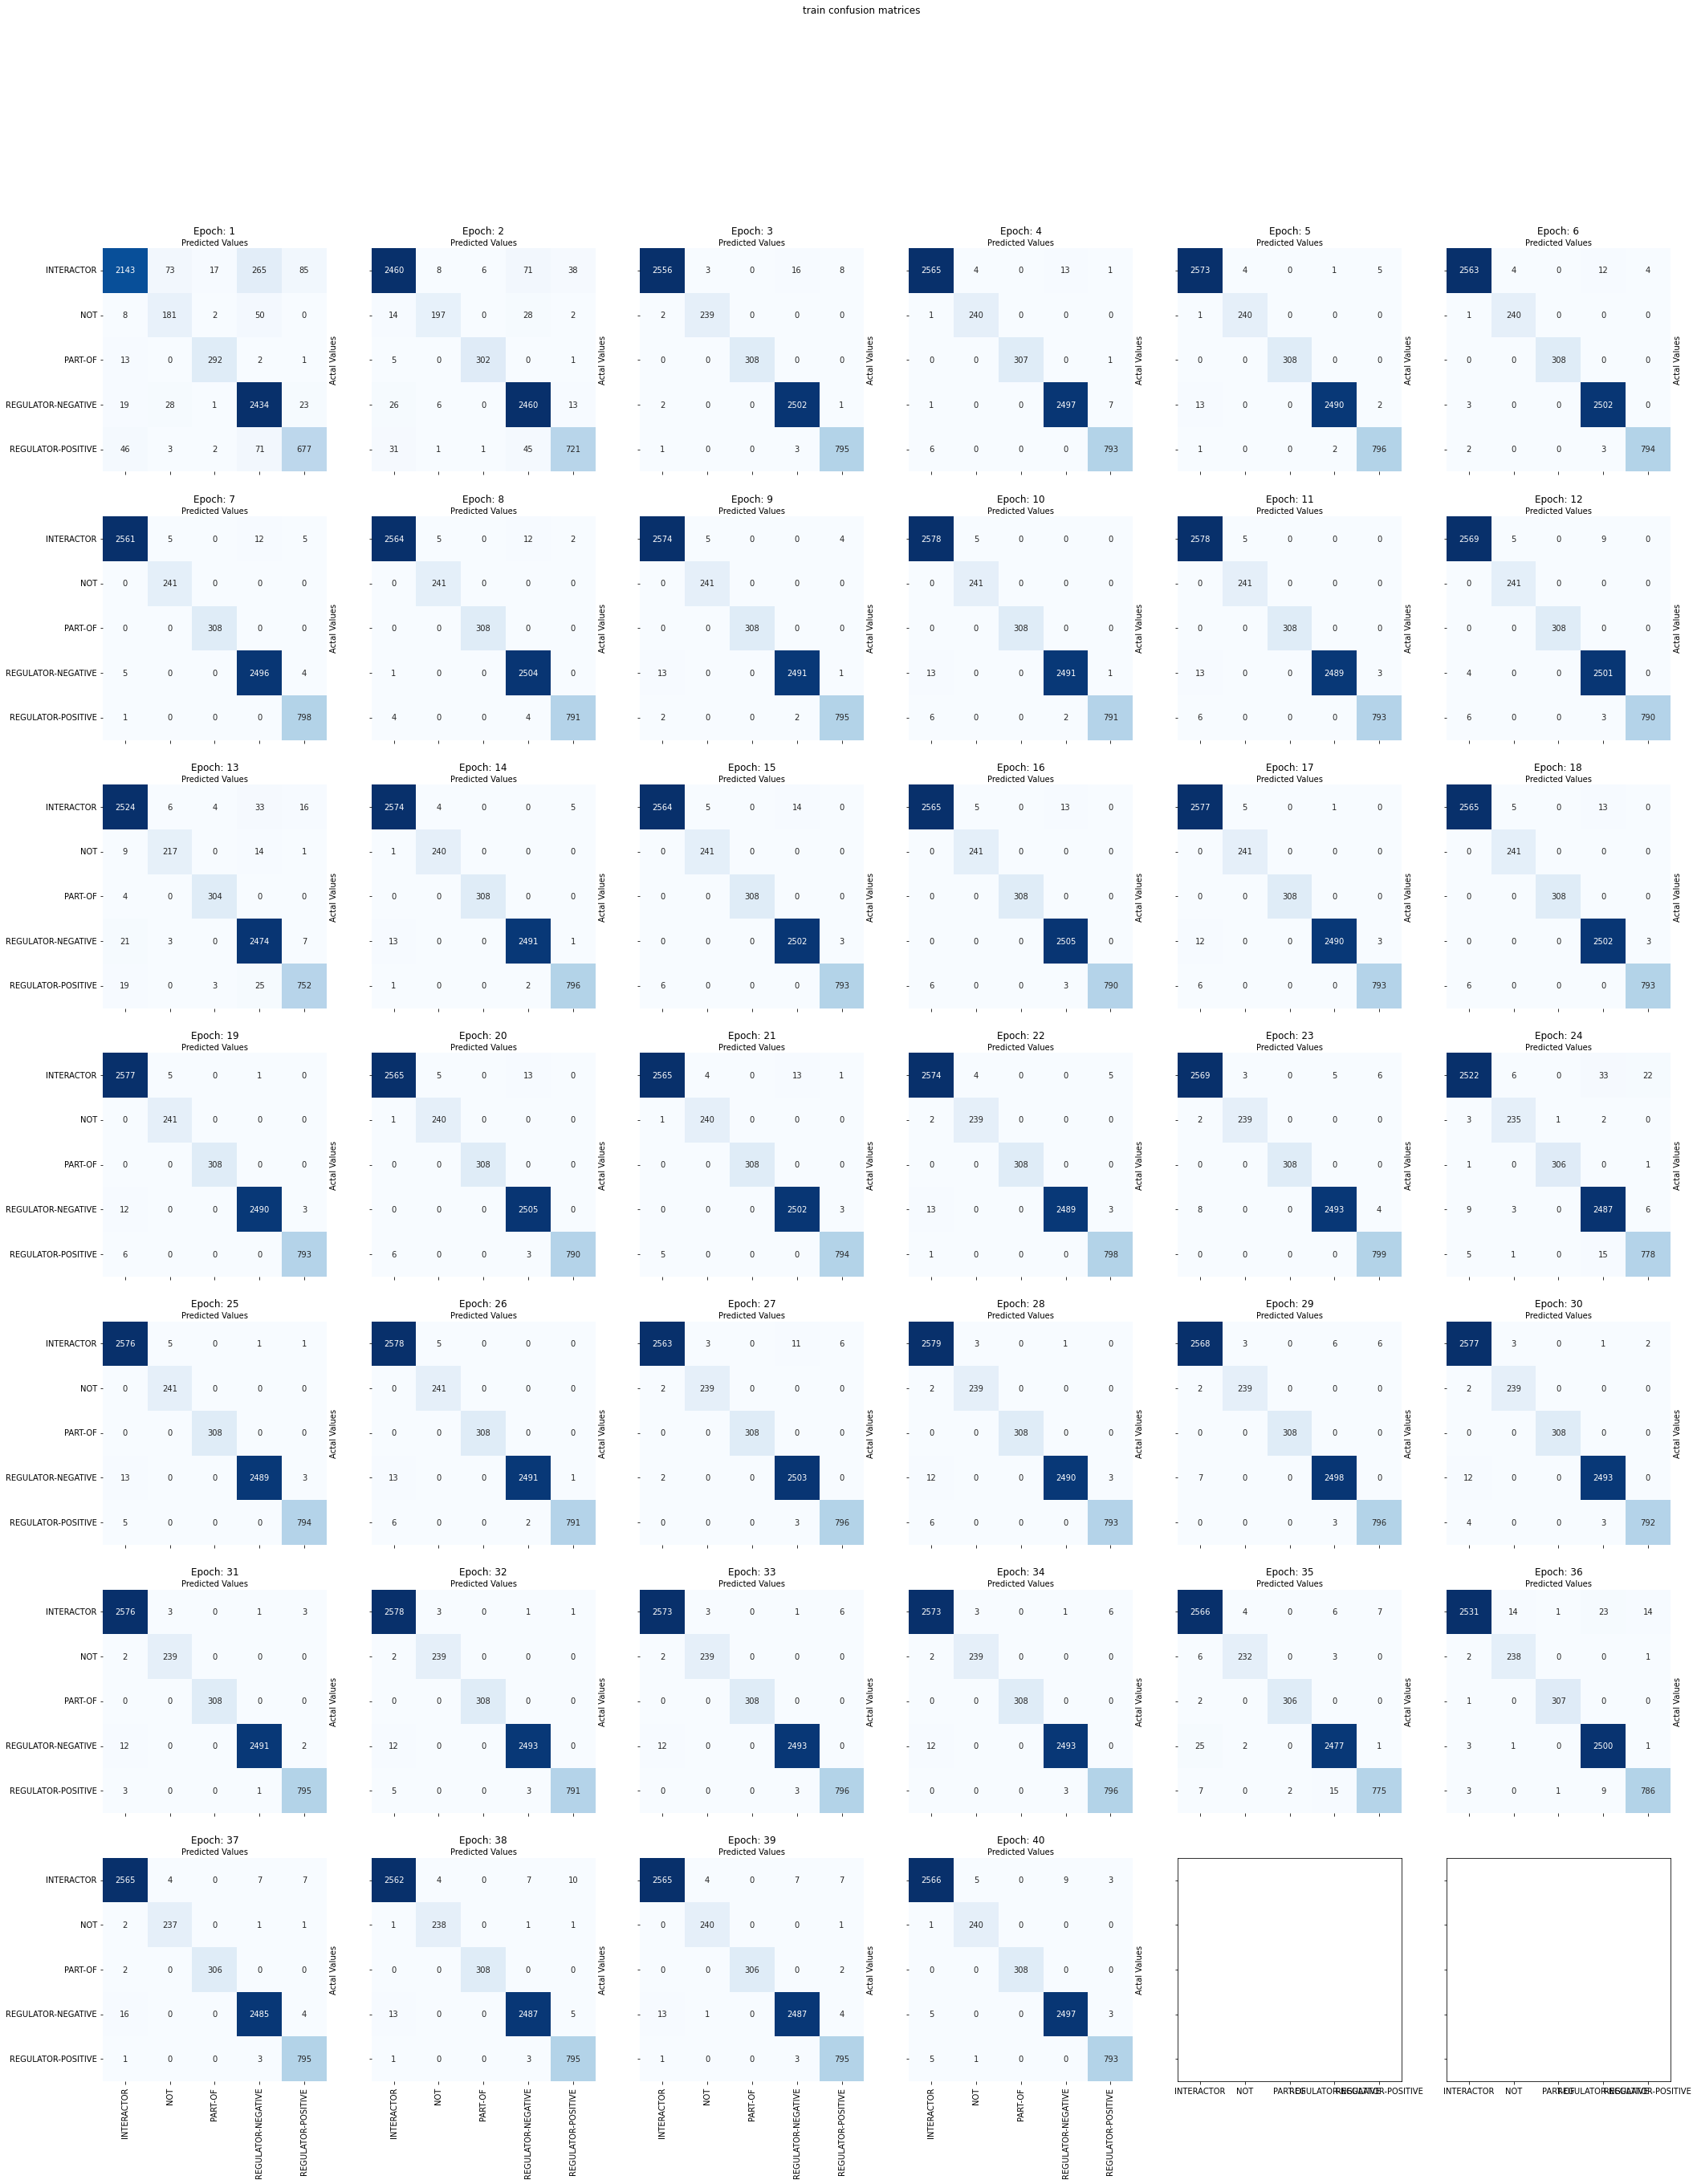

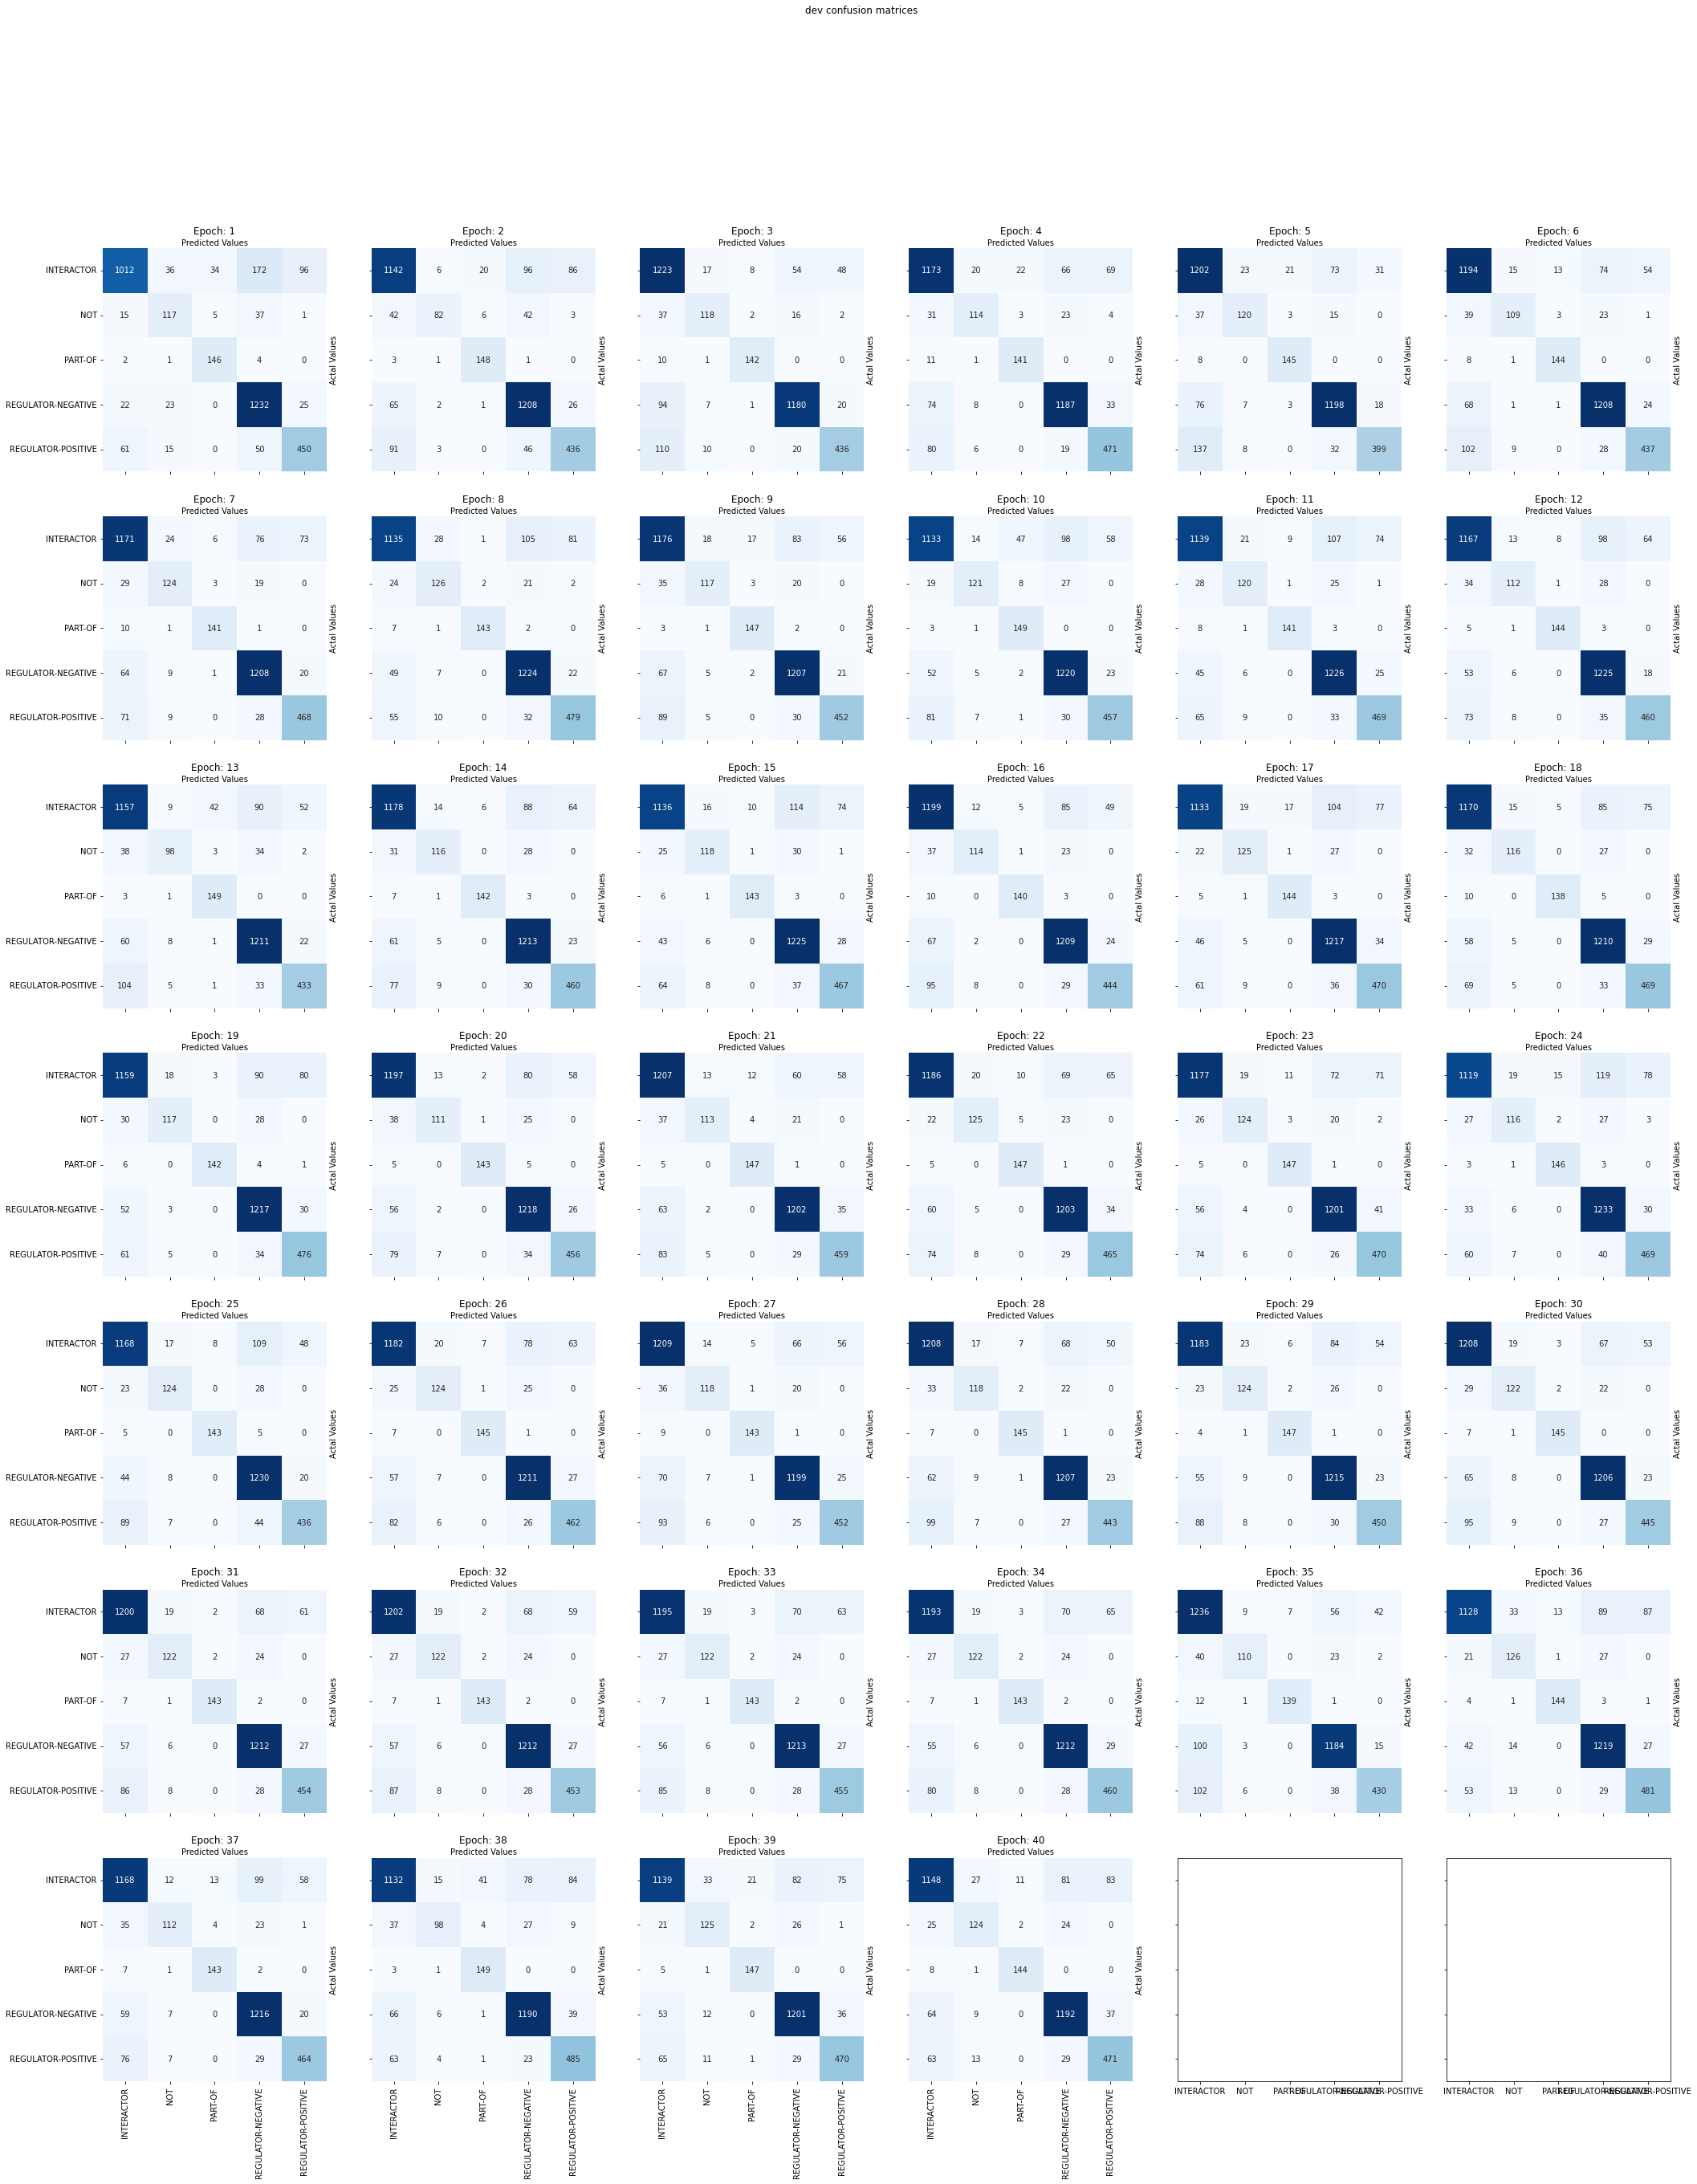

In [35]:
plot_confusion_matrices(train_data, "train")
plot_confusion_matrices(dev_data, "dev")

## Tests

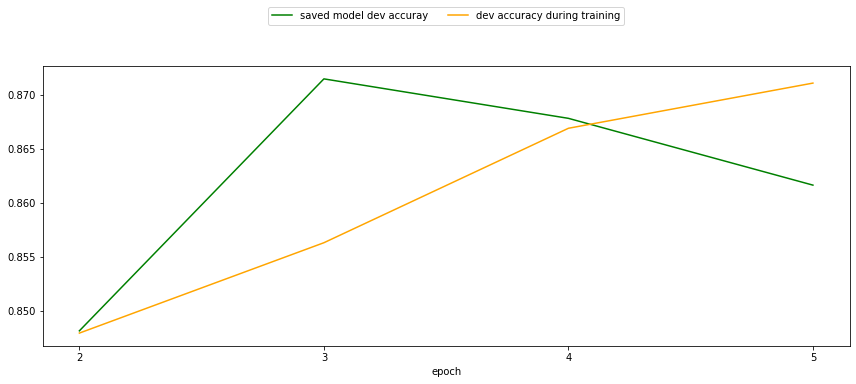

In [52]:
x = list(indices)

slce = 

plt.xticks(indices)

plt.plot(x[1:5], data[dev_key]['accuracy'][1:5],     color="green") # accuracies returned by the eval.py script
plt.plot(x[1:5], data['average validation accuracy'][1:5], color="orange")

plt.legend(["saved model dev accuray", 'dev accuracy during training'], 
            loc="upper center", bbox_to_anchor=(0.5, 1.23),
            fancybox=True, ncol=2)

plt.xlabel('epoch')
plt.tight_layout()
plt.show()